In [17]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [18]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [19]:
# Importing required Libraries for Plotting the Map

import geopandas as gpd
import json
import altair as alt
import pandas as pd

from os import listdir
from os.path import isfile, join
import glob

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

In [20]:
### Reading the US 2018 dataset
US_df = pd.read_csv('US_data/US_2018/US.csv')

In [21]:
### Display the fatures
US_df.columns

Index(['ID', 'Date', 'PM25', 'X', 'Y', 'Region', 'Lon', 'Lat', 'Hour',
       'CF_CLDTT', 'CF_PS', 'CF_Q', 'CF_Q10M', 'CF_Q2M', 'CF_RH', 'CF_SLP',
       'CF_T', 'CF_T10M', 'CF_T2M', 'CF_TPREC', 'CF_TROPPB', 'CF_TS', 'CF_U',
       'CF_U10M', 'CF_U2M', 'CF_V', 'CF_V10M', 'CF_V2M', 'CF_ZL', 'CF_ZPBL',
       'LC_Shrubs', 'LC_Herbaceous', 'LC_Agriculture', 'LC_Urban', 'LC_Bare',
       'LC_Snow', 'LC_Water', 'LC_Wetland', 'LC_Lichen', 'LC_Closed_Forest',
       'LC_Open_Forest', 'LC_Ocean', 'Elevation', 'Dist_Primary',
       'Dist_Secondary', 'Pop'],
      dtype='object')

In [22]:
### Split into features and target 
target_US = ['PM25']
US_target_df = US_df['PM25']
US_features_df = US_df.drop(target_US, axis = 1)

### Drop the unwanted features
drop_features = ['ID', 'Date', 'X', 'Y', 'Region', 'Lon', 'Lat', 'Hour']
US_features_df = US_features_df.drop(drop_features, axis = 1)
US_features_df

,CF_CLDTT,CF_PS,CF_Q,CF_Q10M,CF_Q2M,CF_RH,CF_SLP,CF_T,CF_T10M,CF_T2M,...,LC_Water,LC_Wetland,LC_Lichen,LC_Closed_Forest,LC_Open_Forest,LC_Ocean,Elevation,Dist_Primary,Dist_Secondary,Pop
0,0.822249,101780.661168,0.011500,0.011838,0.012141,0.837268,101825.056553,292.406328,293.182493,293.374703,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
1,0.159620,102586.017791,0.002888,0.003378,0.003814,0.369478,102639.076030,283.998410,285.096864,285.723702,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
2,0.913732,101890.108699,0.010582,0.010980,0.011238,0.638061,101941.687540,295.308783,295.024254,294.503459,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
3,0.021333,101573.233407,0.013026,0.013374,0.013649,0.707336,101620.657506,296.920936,296.922180,296.435095,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
4,0.631767,102309.789219,0.007090,0.007545,0.007961,0.626988,102352.460726,289.442190,290.433638,290.932738,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694181,0.994987,99902.130697,0.004372,0.004462,0.004501,0.950162,102123.652099,275.632048,275.950659,275.856783,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694182,0.989416,99964.743684,0.004428,0.004644,0.004739,0.859667,102143.060954,277.220957,277.377376,277.166318,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694183,0.958669,99561.566242,0.004872,0.005140,0.005357,0.785571,101715.243219,280.151501,280.333156,279.874312,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694184,0.965298,100449.298089,0.005202,0.005273,0.005292,0.941464,102657.021189,278.303877,278.574335,278.377453,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333


In [23]:
### Display the features
US_features_df.columns

Index(['CF_CLDTT', 'CF_PS', 'CF_Q', 'CF_Q10M', 'CF_Q2M', 'CF_RH', 'CF_SLP',
       'CF_T', 'CF_T10M', 'CF_T2M', 'CF_TPREC', 'CF_TROPPB', 'CF_TS', 'CF_U',
       'CF_U10M', 'CF_U2M', 'CF_V', 'CF_V10M', 'CF_V2M', 'CF_ZL', 'CF_ZPBL',
       'LC_Shrubs', 'LC_Herbaceous', 'LC_Agriculture', 'LC_Urban', 'LC_Bare',
       'LC_Snow', 'LC_Water', 'LC_Wetland', 'LC_Lichen', 'LC_Closed_Forest',
       'LC_Open_Forest', 'LC_Ocean', 'Elevation', 'Dist_Primary',
       'Dist_Secondary', 'Pop'],
      dtype='object')

In [ ]:
### Hyperparameter Optimization

import joblib
from dask.distributed import Client, progress

client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [50,100,150,200],
            "max_depth"      : [3,4,5,6,7],
            "max_features"      : ["auto", "sqrt", "log2"],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs = 5, cv = 5)

with joblib.parallel_backend('dask'):
    grid.fit(US_features_df, US_target_df)
    
#grid_search.fit(X, y)



/Users/shrey/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64082 instead
  warnings.warn(
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.49 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.49 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.49 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.49 GB -- Worker memory limit: 2.0

In [8]:
## Find feature importance using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

modelRF = RandomForestRegressor(n_estimators = 100)
modelRF.fit(US_features_df, US_target_df)

KeyboardInterrupt: 

Text(0.5, 0, 'Random Forest Feature Importance')

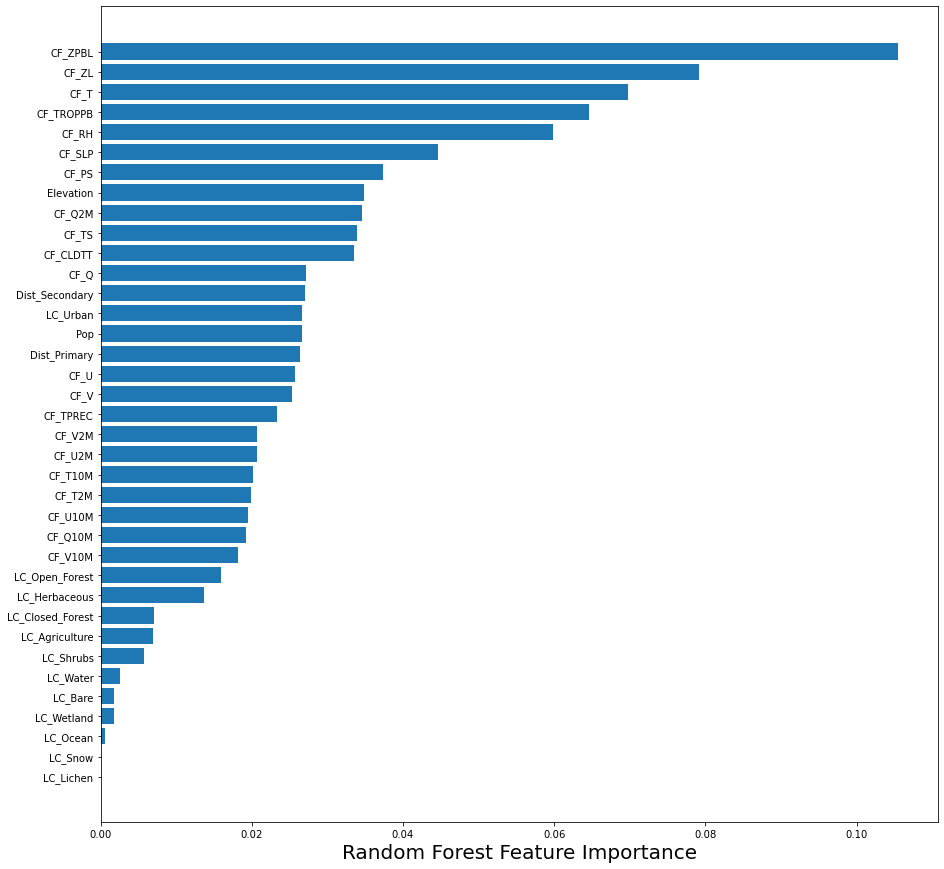

In [27]:
## Find feature importance using Random Forest Regressor
importance_idx = modelRF.feature_importances_.argsort()

fig, axs = plt.subplots(figsize = (15, 15))

plt.barh(US_features_df.columns[importance_idx], modelRF.feature_importances_[importance_idx])
plt.xlabel("Random Forest Feature Importance", fontsize = 20)

# ## summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

In [9]:
### Selecting features based on feature importance determined.
feature_selection = ['LC_Bare', 'LC_Snow', 'LC_Water', 'LC_Wetland', 'LC_Lichen', 'LC_Ocean', 'LC_Shrubs', 'LC_Agriculture', 'LC_Closed_Forest', 'LC_Herbaceous', 
                    'LC_Open_Forest']

US_features_df = US_features_df.drop(feature_selection, axis = 1)
US_features_df

,CF_CLDTT,CF_PS,CF_Q,CF_Q10M,CF_Q2M,CF_RH,CF_SLP,CF_T,CF_T10M,CF_T2M,...,CF_V,CF_V10M,CF_V2M,CF_ZL,CF_ZPBL,LC_Urban,Elevation,Dist_Primary,Dist_Secondary,Pop
0,0.822249,101780.661168,0.011500,0.011838,0.012141,0.837268,101825.056553,292.406328,293.182493,293.374703,...,-9.979553,-8.698721,-7.087215,68.877011,865.082550,0.05,1,345375.639808,351276.487109,4.000000
1,0.159620,102586.017791,0.002888,0.003378,0.003814,0.369478,102639.076030,283.998410,285.096864,285.723702,...,-5.881760,-5.428489,-4.633909,66.748216,642.866028,0.05,1,345375.639808,351276.487109,4.000000
2,0.913732,101890.108699,0.010582,0.010980,0.011238,0.638061,101941.687540,295.308783,295.024254,294.503459,...,2.385315,1.740182,1.248916,69.519133,1159.828248,0.05,1,345375.639808,351276.487109,4.000000
3,0.021333,101573.233407,0.013026,0.013374,0.013649,0.707336,101620.657506,296.920936,296.922180,296.435095,...,3.651930,2.721747,1.889008,69.988950,818.179102,0.05,1,345375.639808,351276.487109,4.000000
4,0.631767,102309.789219,0.007090,0.007545,0.007961,0.626988,102352.460726,289.442190,290.433638,290.932738,...,-7.743313,-7.067838,-5.939910,68.093165,831.890191,0.05,1,345375.639808,351276.487109,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694181,0.994987,99902.130697,0.004372,0.004462,0.004501,0.950162,102123.652099,275.632048,275.950659,275.856783,...,1.856414,1.109360,0.739871,241.554053,196.688464,0.82,55,1812.713641,1048.631404,1049.833333
694182,0.989416,99964.743684,0.004428,0.004644,0.004739,0.859667,102143.060954,277.220957,277.377376,277.166318,...,0.453232,0.298727,0.213858,241.968106,140.427736,0.82,55,1812.713641,1048.631404,1049.833333
694183,0.958669,99561.566242,0.004872,0.005140,0.005357,0.785571,101715.243219,280.151501,280.333156,279.874312,...,-0.272080,-0.167481,-0.106502,242.560045,86.156806,0.82,55,1812.713641,1048.631404,1049.833333
694184,0.965298,100449.298089,0.005202,0.005273,0.005292,0.941464,102657.021189,278.303877,278.574335,278.377453,...,2.449381,1.606078,1.092045,242.237131,263.324086,0.82,55,1812.713641,1048.631404,1049.833333


In [10]:
### Split into Train-Test

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(US_features_df, US_target_df, test_size = 0.15)

## 10-Fold CV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

cnt = 1
## split data into training and test set.
for train_idx, test_idx in kf.split(US_features_df, US_target_df):
    print(f'Fold:{cnt}, Train set: {len(train_idx)}, Test set:{len(test_idx)}')
    cnt += 1
    
score_mse_cv = cross_val_score(RandomForestRegressor(random_state = 42, max_depth = 4, n_jobs = 4), US_features_df, US_target_df, cv = kf, scoring = "neg_mean_squared_error")
mean_rmse = rmse(score_mse_cv.mean())
print(f'RMSE scores for each fold are: {score_mse_cv}')
print('Mean rmse: ',mean_rmse)

score_r2_cv = cross_val_score(RandomForestRegressor(random_state= 42), US_features_df, US_target_df, cv = kf, scoring = "r2")
mean_r2 = score_r2_cv.mean()
print(f'R2 scores for each fold are: {score_r2_cv}')
print('Mean r2: ',mean_r2)

Fold:1, Train set: 624767, Test set:69419
Fold:2, Train set: 624767, Test set:69419
Fold:3, Train set: 624767, Test set:69419
Fold:4, Train set: 624767, Test set:69419
Fold:5, Train set: 624767, Test set:69419
Fold:6, Train set: 624767, Test set:69419
Fold:7, Train set: 624768, Test set:69418
Fold:8, Train set: 624768, Test set:69418
Fold:9, Train set: 624768, Test set:69418
Fold:10, Train set: 624768, Test set:69418
rmse= 6.07
RMSE scores for each fold are: [-38.13440125 -38.32494078 -35.35027265 -34.03218897 -35.41621932
 -41.18478937 -37.67001927 -38.63045265 -35.03026979 -34.4995756 ]
Mean rmse:  None


KeyboardInterrupt: 

In [29]:
importance

array([0.03281973, 0.03659612, 0.02653668, 0.0186407 , 0.03509288,
       0.06079044, 0.04368891, 0.07062741, 0.0189809 , 0.0198606 ,
       0.02358089, 0.06464743, 0.0345272 , 0.02516658, 0.019218  ,
       0.02149208, 0.02530111, 0.01802298, 0.02106458, 0.07772473,
       0.10560496, 0.00570418, 0.01419209, 0.00694804, 0.02657581,
       0.00172001, 0.        , 0.00231404, 0.00172264, 0.        ,
       0.00707577, 0.01585098, 0.00059793, 0.03618875, 0.02709522,
       0.02649878, 0.02753084])

In [9]:
feature_importance_dict = {'CF_CLDTT': 0.03281973, 'CF_PS': 0.03659612, 'CF_Q': 0.02653668, 'CF_Q10M': 0.0186407, 'CF_Q2M': 0.03509288, 
                           'CF_RH': 0.06079044, 'CF_SLP': 0.04368891, 'CF_T': 0.07062741, 'CF_T10M': 0.0189809, 'CF_T2M': 0.0198606, 
                           'CF_TPREC': 0.02358089, 'CF_TROPPB': 0.06464743, 'CF_TS': 0.0345272, 'CF_U': 0.02516658, 'CF_U10M': 0.019218, 
                           'CF_U2M': 0.02149208, 'CF_V': 0.02530111, 'CF_V10M': 0.01802298, 'CF_V2M': 0.02106458, 'CF_ZL': 0.07772473, 
                           'CF_ZPBL': 0.10560496, 'LC_Shrubs': 0.00570418, 'LC_Herbaceous': 0.01419209, 'LC_Agriculture': 0.00694804, 
                           'LC_Urban': 0.02657581, 'LC_Bare': 0.00172001, 'LC_Snow': 0.0, 'LC_Water': 0.00231404, 'LC_Wetland': 0.00172264, 
                           'LC_Lichen': 0.0, 'LC_Closed_Forest': 0.00707577, 'LC_Open_Forest': 0.01585098, 'LC_Ocean': 0.00059793, 
                           'Elevation': 0.03618875, 'Dist_Primary': 0.02709522, 'Dist_Secondary': 0.02649878, 'Pop': 0.02753084}

feature_importance_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key = lambda item: item[1])}
feature_importance_dict

{'LC_Snow': 0.0,
 'LC_Lichen': 0.0,
 'LC_Ocean': 0.00059793,
 'LC_Bare': 0.00172001,
 'LC_Wetland': 0.00172264,
 'LC_Water': 0.00231404,
 'LC_Shrubs': 0.00570418,
 'LC_Agriculture': 0.00694804,
 'LC_Closed_Forest': 0.00707577,
 'LC_Herbaceous': 0.01419209,
 'LC_Open_Forest': 0.01585098,
 'CF_V10M': 0.01802298,
 'CF_Q10M': 0.0186407,
 'CF_T10M': 0.0189809,
 'CF_U10M': 0.019218,
 'CF_T2M': 0.0198606,
 'CF_V2M': 0.02106458,
 'CF_U2M': 0.02149208,
 'CF_TPREC': 0.02358089,
 'CF_U': 0.02516658,
 'CF_V': 0.02530111,
 'Dist_Secondary': 0.02649878,
 'CF_Q': 0.02653668,
 'LC_Urban': 0.02657581,
 'Dist_Primary': 0.02709522,
 'Pop': 0.02753084,
 'CF_CLDTT': 0.03281973,
 'CF_TS': 0.0345272,
 'CF_Q2M': 0.03509288,
 'Elevation': 0.03618875,
 'CF_PS': 0.03659612,
 'CF_SLP': 0.04368891,
 'CF_RH': 0.06079044,
 'CF_TROPPB': 0.06464743,
 'CF_T': 0.07062741,
 'CF_ZL': 0.07772473,
 'CF_ZPBL': 0.10560496}

In [10]:
## Standard Deviation of all the features of the dataframe

stddev_features = US_features_df.std(axis = 0, skipna = True).sort_values()

Text(0, 0.5, 'Standard Deviation')

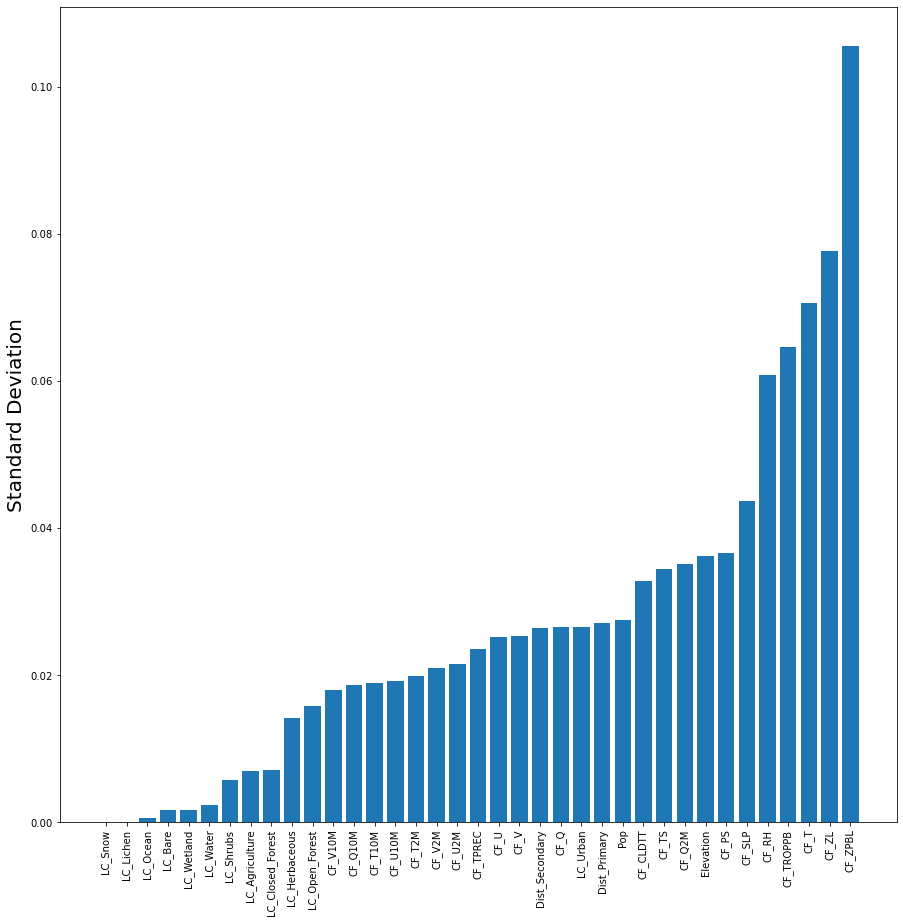

In [20]:
keys = feature_importance_dict.keys()
values = feature_importance_dict.values()

fig, axs = plt.subplots(figsize = (15, 15))

plt.xticks(rotation='vertical')
plt.bar(keys, values)
plt.ylabel("Standard Deviation", fontsize = 20)

In [ ]:
importance_idx = modelRF.feature_importances_.argsort()
fig, axs = plt.subplots(figsize = (15, 15))
importance_idx

# plt.bar(indices, highPower, width=width, 
#         color='b', label='Max Power in mW')
# plt.bar([i+0.25*width for i in indices], lowPower, 
#         width=0.5*width, color='r', alpha=0.5, label='Min Power in mW')

# plt.xticks(indices+width/2., 
#            ['T{}'.format(i) for i in range(len(highPower))] )

# plt.legend()

# plt.show()

In [16]:
import dask.dataframe as dd

### Reading the US 2018 dataset using Dask
US_df = dd.read_csv('US_data/US_2018/US.csv')
US_df

,ID,Date,PM25,X,Y,Region,Lon,Lat,Hour,CF_CLDTT,CF_PS,CF_Q,CF_Q10M,CF_Q2M,CF_RH,CF_SLP,CF_T,CF_T10M,CF_T2M,CF_TPREC,CF_TROPPB,CF_TS,CF_U,CF_U10M,CF_U2M,CF_V,CF_V10M,CF_V2M,CF_ZL,CF_ZPBL,LC_Shrubs,LC_Herbaceous,LC_Agriculture,LC_Urban,LC_Bare,LC_Snow,LC_Water,LC_Wetland,LC_Lichen,LC_Closed_Forest,LC_Open_Forest,LC_Ocean,Elevation,Dist_Primary,Dist_Secondary,Pop
npartitions=7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,float64,float64,float64,object,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
from distributed import Client, LocalCluster

if __name__ == '__main__':
    cluster = LocalCluster()
    client = Client(cluster)
    print(client)

/Users/shrey/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 49190 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:49191' processes=4 threads=16, memory=68.72 GB>
